<a href="https://colab.research.google.com/github/Rashida-Rangwala/Walmart_Casestudy/blob/main/Walmart_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers:

Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("walmart_data.csv")

**Basic Exploration**

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


Finding out null values corresponding to each column.

By looking at the data, we can say that there are no null values present in any of the columns.

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Let's check the outliers here

In [ ]:
4df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


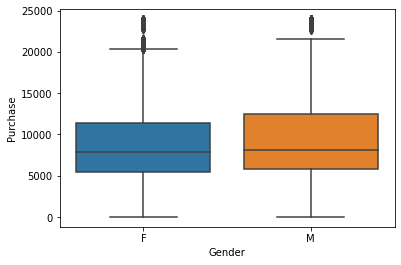

In [ ]:
sns.boxplot(data = df, x = "Gender", y ="Purchase")

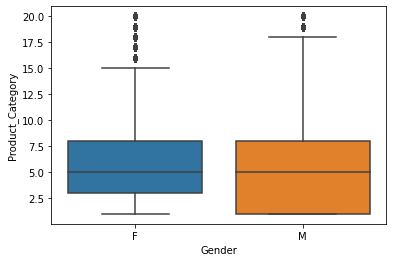

In [ ]:
sns.boxplot(data = df, x = "Gender", y ="Product_Category")

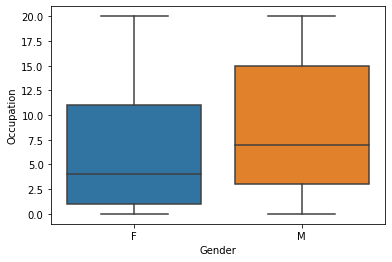

In [ ]:
sns.boxplot(data = df, x = "Gender", y ="Occupation")

Looking at the mean and 50%(50 percentile - median) of the data above we can say that there exists some outliers in the given data.

In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

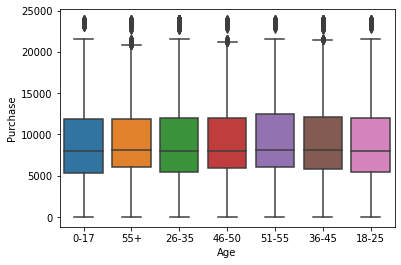

In [ ]:
sns.boxplot(data = df, x = "Age", y ="Purchase")

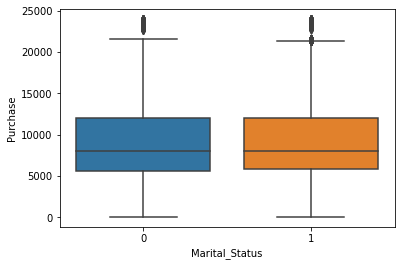

In [ ]:
sns.boxplot(data = df, x = "Marital_Status", y ="Purchase")

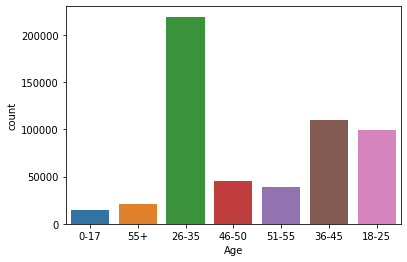

In [ ]:
sns.countplot(data = df, x = "Age")

Let's find out the correlartion between all the columns given in the data

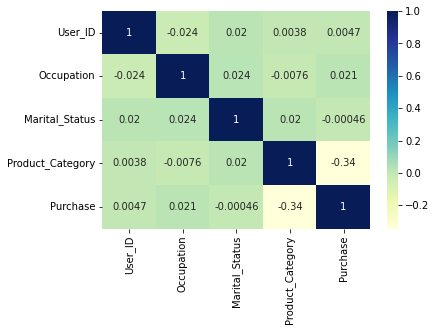

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df.groupby(["Product_ID", "Gender"])["Age"].describe()

count unique    top freq
Product_ID Gender                         
P00000142  F        347      7  26-35  123
           M        805      7  26-35  322
P00000242  F         91      7  36-45   25
           M        285      7  26-35  107
P00000342  F         69      7  26-35   29
...                 ...    ...    ...  ...
P0099742   M         82      5  26-35   26
P0099842   F         51      7  26-35   13
           M         51      6  36-45   14
P0099942   F          7      3  51-55    3
           M          7      4    55+    2

[6955 rows x 4 columns]

**Checking the spending pattern Gender wise**

In [ ]:
df_male = df[df["Gender"] =="M"]
len(df_male)

414259

In [ ]:
avg_male_spend = np.mean(df_male["Purchase"])
avg_male_spend

9437.526040472265

In [ ]:
df_female = df[df["Gender"] =="F"]
len(df_female)

135809

In [ ]:
avg_female_spend = np.mean(df_female["Purchase"])
avg_female_spend

8734.565765155476

As per the above results, it is evident that Females spend more than Males. The data consists of 414259 Male customers spending average amount 9437.53 while there are 135809 females with average spending 8734.57

**Sampling Distribution**

**Male Purchase Samples**

In [ ]:
df_male["Purchase"].sample(10000).mean()

9426.8758

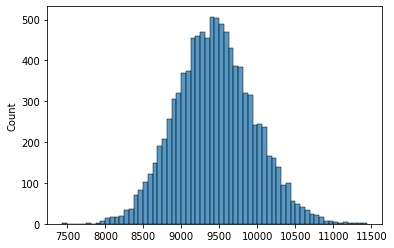

In [ ]:
num_samples = 100
collect_sample_means = []
for person in range(10000):
    sample_mean = df_male["Purchase"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)
sns.histplot(collect_sample_means)

Confidence Interval

In [ ]:
#99% Confidence interval
np.percentile(collect_sample_means, [0.5, 99.5])

array([ 8149.78505, 10779.0096 ])

In [ ]:
#95% Confidence interval
np.percentile(collect_sample_means, [2.5, 97.5])

array([ 8455.576  , 10460.58025])

In [ ]:
#90% Confidence interval
np.percentile(collect_sample_means, [5, 95])

array([ 8609.7405, 10294.224 ])

Looking at the above samples collected 10000 times and looking at means of 100 datapoints each time, it is observed that the distribution is normal.

An assumption on the Population Mean of Purchase can be around 9500 for Male customers.

The confidence Intervals are also calculated above and it also lies around 8600 to 10200 approx.

For Business like Walmart, CI of 95% or 90% both can be taken into consideration.

**Female Purchase Samples**

In [ ]:
df_female["Purchase"].sample(10000).mean()

8822.169

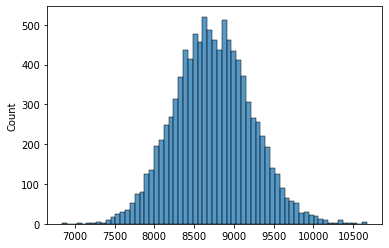

In [ ]:
num_samples = 100
collect_sample_means_female = []
for person in range(10000):
    sample_mean_female = df_female["Purchase"].sample(num_samples).mean()
    collect_sample_means_female.append(sample_mean_female)
sns.histplot(collect_sample_means_female)

Confidence Interval

In [ ]:
#99% Confidence interval
np.percentile(collect_sample_means_female, [0.5, 99.5])

array([ 7539.94905, 10027.4571 ])

In [ ]:
#95% Confidence interval
np.percentile(collect_sample_means_female, [2.5, 97.5])

array([7811.50725, 9700.295  ])

In [ ]:
#90% Confidence interval
np.percentile(collect_sample_means_female, [5, 95])

array([7955.3395, 9526.7825])

Looking at the above samples collected 10000 times and looking at means of 100 datapoints each time, it is observed that the distribution is normal.

An assumption on the Population Mean of Purchase can be around 8700 for female customers.

The confidence Intervals are also calculated above and it also lies around 7900 to 9500 approx.

For Business like Walmart, CI of 95% or 90% both can be taken into consideration.

**The purchase amount of Males and Females is overlapping as seen above.Although the data provided, consists of more Males than Females, so an approximation can be made that Females are spending more because less data is also giving good purchase amount for females.**

**Age wise Purchase**

In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df_under_18 = df[df["Age"] == "0-17"]
len(df_under_18)

15102

In [ ]:
df_under_18["Purchase"].sample(10000).mean()

8942.7757

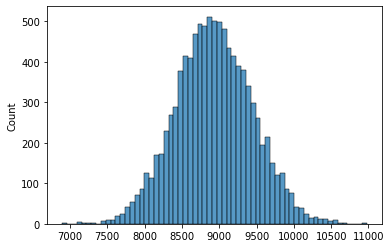

In [ ]:
num_samples = 100
collect_sample_means_under_18 = []
for person in range(10000):
    sample_mean_under_18 = df_under_18["Purchase"].sample(num_samples).mean()
    collect_sample_means_under_18.append(sample_mean_under_18)
sns.histplot(collect_sample_means_under_18)

In [ ]:
#99% Confidence interval
np.percentile(collect_sample_means_under_18, [0.5, 99.5])

array([ 7663.1003 , 10313.84185])

In [ ]:
#95% Confidence interval
np.percentile(collect_sample_means_under_18, [2.5, 97.5])

array([7938.54225, 9947.92575])

In [ ]:
#90% Confidence interval
np.percentile(collect_sample_means_under_18, [5, 95])

array([8089.1805, 9792.1055])

As we can see in the case of Age - 0 to 17, the purchase mean lies around 8945.

All other analysis also gives similar output.

In [ ]:
df_age_18_25 = df[df["Age"] == "18-25"]

In [ ]:
df_age_18_25["Purchase"].sample(10000).mean()

9130.0715

In [ ]:
df_age_26_35 = df[df["Age"] == "26-35"]

In [ ]:
df_age_26_35["Purchase"].sample(10000).mean()

9126.5115

In [ ]:
df_age_36_45 = df[df["Age"] == "36-45"]

In [ ]:
df_age_36_45["Purchase"].sample(10000).mean()

9337.5158

In [ ]:
df_age_46_50 = df[df["Age"] == "46-50"]

In [ ]:
df_age_46_50["Purchase"].sample(10000).mean()

9197.9808

In [ ]:
df_age_51_55 = df[df["Age"] == "51-55"]

In [ ]:
df_age_51_55["Purchase"].sample(10000).mean()

9543.5301

In [ ]:
df_age_55_above = df[df["Age"] == "55+"]

In [ ]:
df_age_55_above["Purchase"].sample(10000).mean()

9372.8096

After looking at all the Age bins, the purchase still looks pretty similar for all the age groups.

We can say that the highest spent is done by the Age group 51 to 55 as mostly during Black Friday they will try to gift their children and parents.

**Marital Status vs Purchase**

In [ ]:
df["Marital_Status"].unique()

array([0, 1])

In [ ]:
df_unmarried = df[df["Marital_Status"] == 0]

In [ ]:
df_married = df[df["Marital_Status"] == 1]

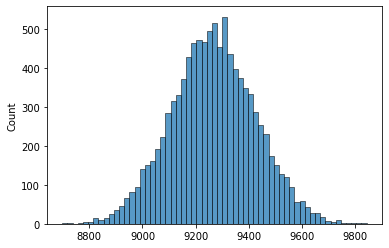

In [ ]:
num_samples = 1000
collect_sample_means_unmarried = []
for person in range(10000):
    sample_mean_unmarried = df_unmarried["Purchase"].sample(num_samples).mean()
    collect_sample_means_unmarried.append(sample_mean_unmarried)
sns.histplot(collect_sample_means_unmarried)

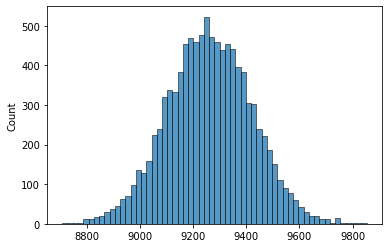

In [ ]:
num_samples = 1000
collect_sample_means_married = []
for person in range(10000):
    sample_mean_married = df_married["Purchase"].sample(num_samples).mean()
    collect_sample_means_married.append(sample_mean_married)
sns.histplot(collect_sample_means_married)

Looking at the Married and Unmarried data above, it seems that mostly people are spending similar amount irrespective of their marital status.

**Final Insights -**

The data provided above shows that mostly the Purchase is around 9000 across all age groups, married and unmarried people and males and females.

One difference to note is there are comparablily less women in the sample space then men so when expanding the spectrum, Women might turn out to Purchase more.

The Age 26-35 people were found to have more purchases made in the entire data as clearly they tend to be buying more stuff for themselves or for gifting purposes.

**Recommendations - **

1. Walmart should provide some good offers to Women as they usually like to shop more. When they see some nice offers or discounts, they will definetly buy more.

2. Walmart can also launch some Age wise discounts or offer goodies/freebies to customers to attract people from all age groups.

3. Range of products which interest the people should also be diversified.